# Part 1 - Task 4.10: Coding Etiquette & Excel Reporting

## The Script contains the following points:
1. Importing Libraries
2. Importing Dataframes
3. The Personally Identifiable Information (PII) data 
4. Geographic segmentation
5. Low-activity Customers
6. Customer Profiling & Visualizations
7. Exporting the dataset as a pickle file

## 1. Importing Data and Libraries 

In [2]:
# Import libraries 

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Importing Dataframe

In [3]:
path = r'/Users/datcaodo/Documents/22-03-2024 Instacart Basket Analysis'

In [4]:
customers_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_ords_prods_merge.pkl'))

In [4]:
# Checking the output 

customers_ords_prods_merge.head()

,user_id,Gender,STATE,Age,date_joined,number_dependants,fam_status,income,product_id,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Slowest busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer


In [5]:
customers_ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   user_id                     int32   
 1   Gender                      object  
 2   STATE                       object  
 3   Age                         int64   
 4   date_joined                 object  
 5   number_dependants           int64   
 6   fam_status                  object  
 7   income                      int64   
 8   product_id                  int64   
 9   product_name                object  
 10  aisle_id                    int64   
 11  department_id               int64   
 12  prices                      float64 
 13  order_id                    int64   
 14  eval_set                    object  
 15  order_number                int64   
 16  orders_day_of_week          int64   
 17  order_hour_of_day           int64   
 18  days_since_prior_order      float64 
 19

## 3. The Personally Identifiable Information (PII) data 

The dataset includes personally identifiable information (PII) such as user_id, gender, age, number of dependants, family status, and income. It's important to note that these data have been artificially generated for the purpose of training in this course, and do not represent real individuals.

The original customer data, which contained first names and Surname, has been appropriately redacted from the dataset to ensure privacy and compliance with data protection regulations.

## 4. Geographic segmentation

### 4.1 Define regions

#### Northeast

In [5]:
# Defining Northeast Region by States
northeast_states = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [6]:
# Assign to new 'region' column 
customers_ords_prods_merge.loc[customers_ords_prods_merge['STATE'].isin(northeast_states), 'region'] = 'Northeast'

#### Midwest

In [7]:
# Defining Midwest Region by States
midwest_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [8]:
# Assign to new 'region' column 
customers_ords_prods_merge.loc[customers_ords_prods_merge['STATE'].isin(midwest_states), 'region'] = 'Midwest'

#### South

In [9]:
# Defining South Region by States
south_states = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [10]:
# Assign to new 'region' column 
customers_ords_prods_merge.loc[customers_ords_prods_merge['STATE'].isin(south_states), 'region'] = 'South'

#### West

In [11]:
# Defining West Region by States
west_states = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [12]:
# Assign to new 'region' column 
customers_ords_prods_merge.loc[customers_ords_prods_merge['STATE'].isin(west_states), 'region'] = 'West'

In [14]:
# User count by region
customers_ords_prods_merge['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### 4.2 Spending Habits between the different U.S. regions

In [15]:
# Pivot spending_flag base on region
spend_by_region = pd.crosstab(customers_ords_prods_merge['region'], customers_ords_prods_merge['spending_flag'], dropna = False).sort_values(by = 'High Spender', ascending = False)

In [16]:
spend_by_region

spending_flag,High Spender,Low Spender
region,,
South,209691,10582194
West,160354,8132559
Midwest,155975,7441350
Northeast,108225,5614511


We can see that the South region is spending the most followed by the West Region. But overall we can see as well that the numbers are higher in the low Spender column compared to the high spender column.

# 5. Low-activity Customers

In [17]:
# Creating exclusion flag
customers_ords_prods_merge['exclusion_flag'] = customers_ords_prods_merge['order_number'] < 5

In [18]:
customers_ords_prods_merge['exclusion_flag'].value_counts()

exclusion_flag
False    24414877
True      7989982
Name: count, dtype: int64

In [19]:
# Creating new data set with orders =<5
df_exclusion = customers_ords_prods_merge.loc[customers_ords_prods_merge['exclusion_flag'] == False]
low_activity = customers_ords_prods_merge.loc[customers_ords_prods_merge['exclusion_flag'] == True]

In [20]:
df_exclusion .shape

(24414877, 34)

In [21]:
df_exclusion ['order_number'].describe()

count    2.441488e+07
mean     2.194990e+01
std      1.771938e+01
min      5.000000e+00
25%      9.000000e+00
50%      1.600000e+01
75%      2.900000e+01
max      9.900000e+01
Name: order_number, dtype: float64

In [22]:
# Creating new data set with orfers >5
df_order_less_5 = customers_ords_prods_merge[customers_ords_prods_merge['exclusion_flag']]

In [23]:
# exporting dataset sample as pickle format
df_order_less_5.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_order_less_5.pkl'))

## 6. Customer Profiling & Visualizations

In [24]:
customers_ords_prods_merge['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

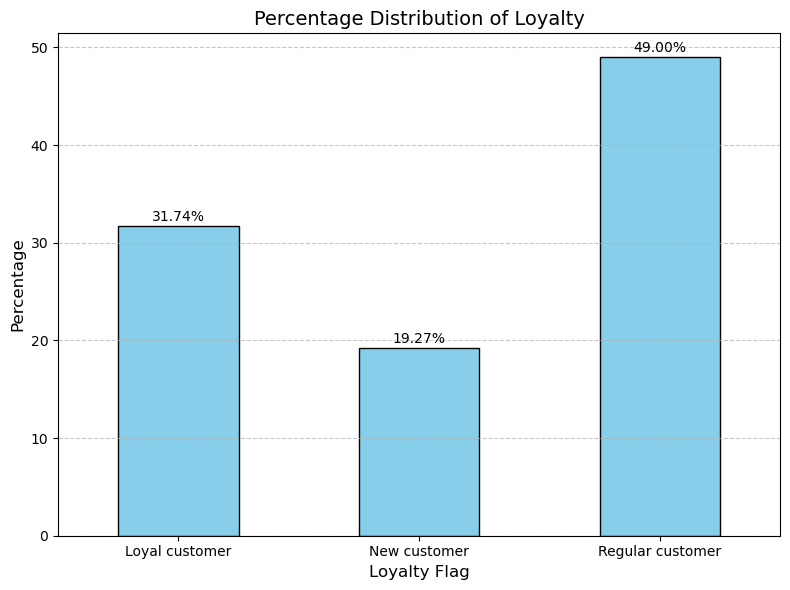

In [25]:
# Calculate percentage distribution of loyalty
loyalty_distribution = (customers_ords_prods_merge['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))  # Set figure size
loyalty_distribution.plot(kind='bar', color='skyblue', edgecolor='black')  # Plotting the bar chart

# Adding labels and title
plt.xlabel('Loyalty Flag', fontsize=12)  # Label for the x-axis
plt.ylabel('Percentage', fontsize=12)  # Label for the y-axis
plt.title('Percentage Distribution of Loyalty', fontsize=14)  # Title of the plot

# Adding percentage labels on top of each bar
for index, value in enumerate(loyalty_distribution):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Save the plot as an image file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_distribution.png'))

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

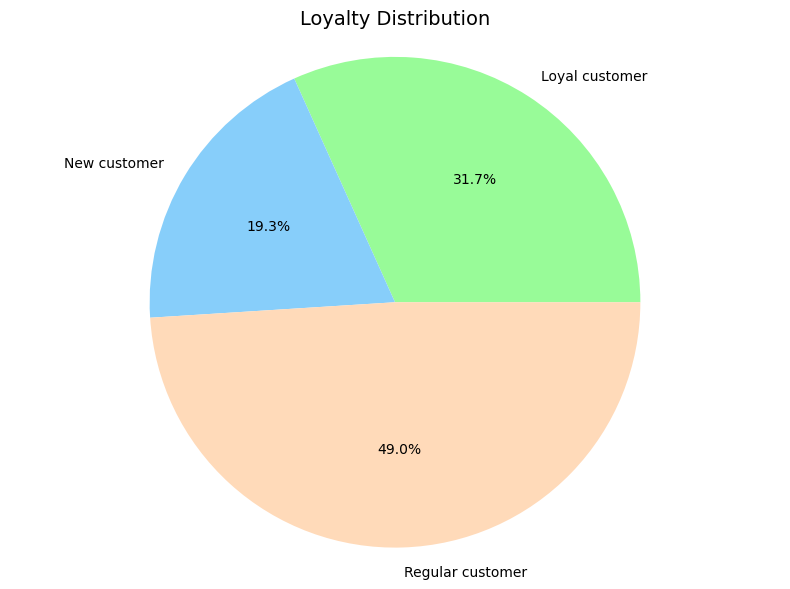

In [26]:
# Calculate percentage distribution of loyalty
loyalty_distribution = (customers_ords_prods_merge['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()

# Plotting the pie chart
plt.figure(figsize=(8, 6))  # Set figure size
loyalty_pie = plt.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', colors=['palegreen', 'lightskyblue', 'peachpuff'])  # Plotting the pie chart

# Adding title
plt.title('Loyalty Distribution', fontsize=14)  # Title of the pie chart

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Save the pie chart as an image file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

# Displaying the pie chart
plt.tight_layout()  # Adjust layout
plt.show()

In [27]:
# Define function to categorize age groups
def categorize_age(Age):
    if Age <= 35:
        return "Young Adult"
    elif 35 < Age <= 55:
        return "Middle-aged Adult"
    else:
        return "Senior"

# Define function to categorize income levels
def categorize_income(income):
    if income < 50000:
        return "Low Income"
    elif 50000 <= income < 100000:
        return "Middle Income"
    else:
        return "High Income"

# Apply functions to create profiling variable
customers_ords_prods_merge['age_group'] = customers_ords_prods_merge['Age'].apply(categorize_age)
customers_ords_prods_merge['income_level'] = customers_ords_prods_merge['income'].apply(categorize_income)


In [28]:
customers_ords_prods_merge.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'number_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_product_price', 'spending_flag',
       'median_days_between_orders', 'frequency_flag', 'region',
       'exclusion_flag', 'age_group', 'income_level'],
      dtype='object')

In [29]:
customers_ords_prods_merge.fam_status.value_counts()

fam_status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

In [30]:
customers_ords_prods_merge.order_number

0           5
1           7
2           8
3           1
4           3
           ..
32404854    3
32404855    3
32404856    3
32404857    3
32404858    3
Name: order_number, Length: 32404859, dtype: int64

In [31]:
customers_ords_prods_merge.head()

,user_id,Gender,STATE,Age,date_joined,number_dependants,fam_status,income,product_id,product_name,...,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,frequency_flag,region,exclusion_flag,age_group,income_level
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,False,Middle-aged Adult,High Income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,False,Middle-aged Adult,High Income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,False,Middle-aged Adult,High Income
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,True,Middle-aged Adult,High Income
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,True,Middle-aged Adult,High Income


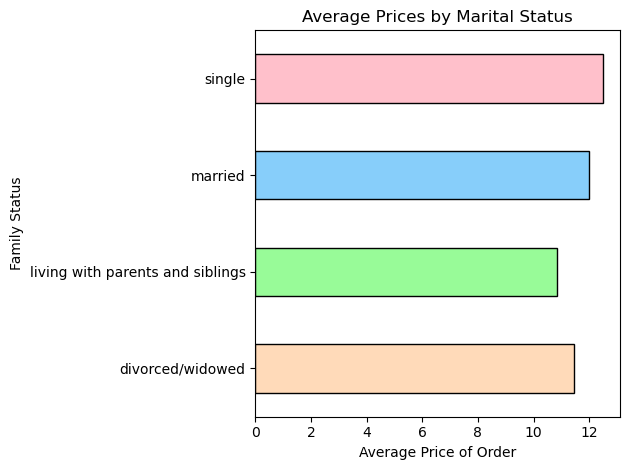

In [32]:
avg_prices_by_marital_status = customers_ords_prods_merge.groupby('fam_status')['prices'].mean()
# Creating bar chart for average price by marital status
colors = ['peachpuff', 'palegreen', 'lightskyblue', 'pink']
bar_marital_avg_price = avg_prices_by_marital_status.plot(kind = 'barh', stacked = False, edgecolor = 'black', color = colors)
plt.title('Average Prices by Marital Status')
plt.xlabel('Average Price of Order')
plt.ylabel('Family Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_price_family.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


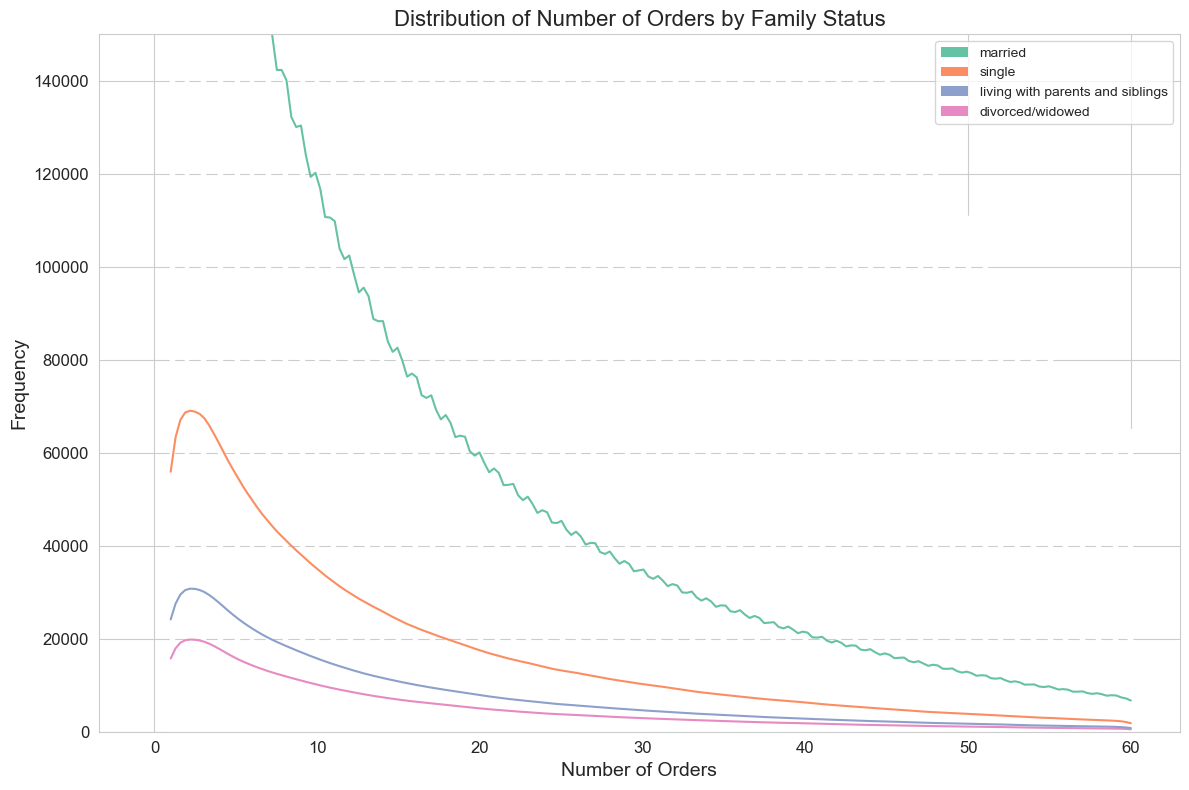

In [33]:
# Set the style
sns.set_style("whitegrid")

# Define custom legend labels and colors
legend_labels = customers_ords_prods_merge['fam_status'].unique()
legend_colors = sns.color_palette("Set2", len(legend_labels))

# Plot distributions for each family status
plt.figure(figsize=(12, 8))

# Plot distribution for each family status
sns.histplot(data=customers_ords_prods_merge[customers_ords_prods_merge['order_number'] <= 60], x='order_number', hue='fam_status', multiple='stack', kde=True, palette='Set2', linewidth=2.5)
plt.title('Distribution of Number of Orders by Family Status', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Remove legend
plt.legend([], [], frameon=False)

# Add custom legend
for label, color in zip(legend_labels, legend_colors):
    plt.bar(0, 0, color=color, label=label, linewidth=0)

# Set y-axis limit for frequency
plt.ylim(0, 150000)

# Adjust tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.legend(loc='upper right')

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_distribution.png'))

plt.show()

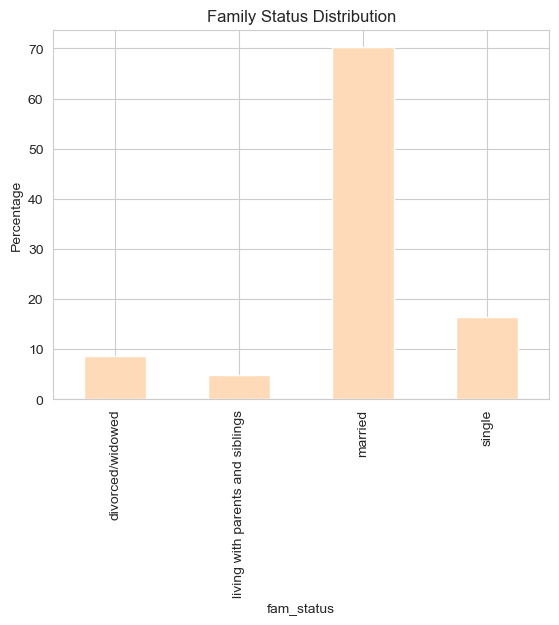

In [34]:
# Plot the percentage distribution of marital status
marital_distribution = (customers_ords_prods_merge['fam_status'].value_counts(normalize=True) * 100).sort_index()
marital_distribution.plot.bar(color=['peachpuff'])
plt.ylabel('Percentage')
plt.title('Family Status Distribution')

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_status_distribution.png'))

plt.show()

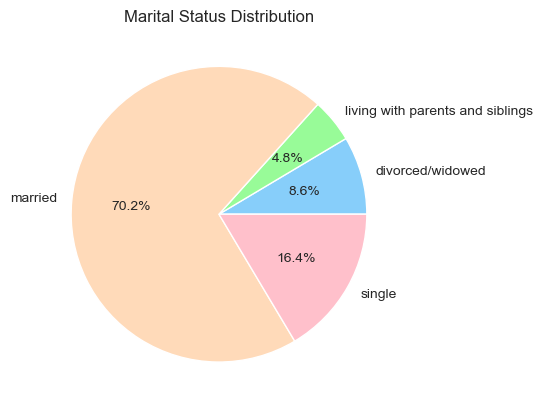

In [35]:
# Plot the pie chart of marital status
marital_pie=plt.pie(marital_distribution, labels=marital_distribution.index, autopct='%1.1f%%', colors = ['lightskyblue', 'palegreen', 'peachpuff', 'pink'])
plt.title('Marital Status Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_marital.png'))

In [13]:
def price_label(row):
    if row['prices'] <= 5:
        return 'Low-range product'
    elif (row['prices'] > 5) and (row['prices'] <= 15):
        return 'Mid-range product'
    else:
        return 'High range'

In [14]:
customers_ords_prods_merge['price_range_loc'] = customers_ords_prods_merge.apply(price_label, axis=1)

<Axes: xlabel='price_range_loc'>

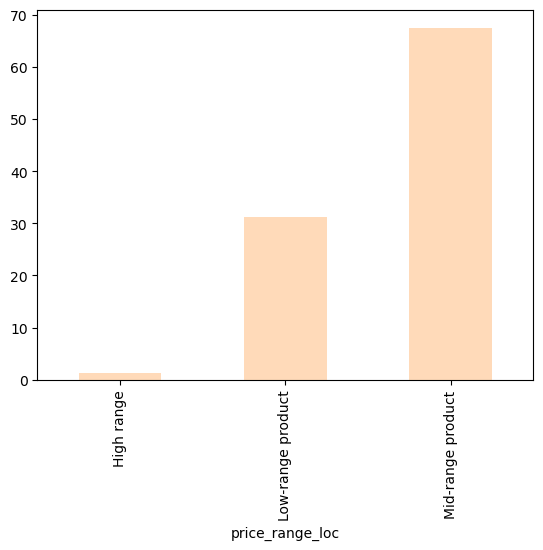

In [15]:
# Plot the percentage distribution of price range 
price_distribution = (customers_ords_prods_merge['price_range_loc'].value_counts(normalize=True) * 100).sort_index()
price_distribution.plot.bar(color=['peachpuff'])

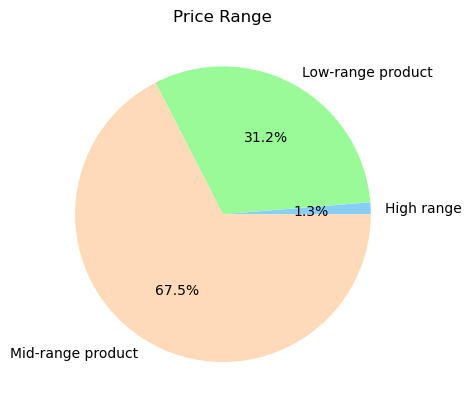

In [16]:
# Plot the pie chart of price range
income_pie=plt.pie(price_distribution, labels=price_distribution.index, autopct='%1.1f%%', colors = ['lightskyblue', 'palegreen', 'peachpuff'])
plt.title('Price Range')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


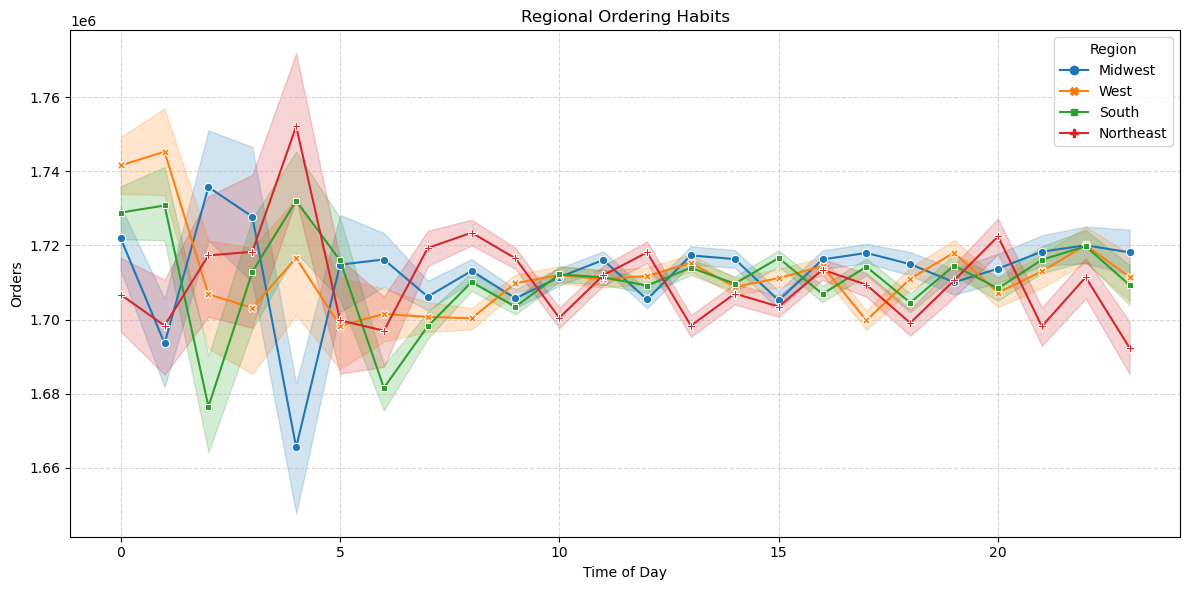

In [13]:
# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create Line Chart with custom palette and styling
regional_ordering_habits_line = sns.lineplot(data=customers_ords_prods_merge, x='order_hour_of_day', y='order_id', hue='region', palette=custom_palette,
                                             style='region', markers=True, dashes=False)
plt.title('Regional Ordering Habits')
plt.xlabel('Time of Day')
plt.ylabel('Orders')
# Display the legend
plt.legend(title='Region', loc='upper right')
# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)
# Show the plot
plt.tight_layout()
plt.show()


In [14]:
# Saving as PNG
regional_ordering_habits_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regional_ordering_habits_line.png'))

## 7. Exporting the dataset as a pickle file

In [15]:
customers_ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))